In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the directories
base_dir = '/content'
train_dir = f'{base_dir}/Seafood'
validation_dir = f'{base_dir}/NotSeafood'

# Image data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary',
                                                    classes=['Seafood', 'NotSeafood'])

validation_generator = validation_datagen.flow_from_directory(base_dir,
                                                              target_size=(150, 150),
                                                              batch_size=32,
                                                              class_mode='binary',
                                                              classes=['Seafood', 'NotSeafood'])


Found 735 images belonging to 2 classes.
Found 735 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
22/22 [==============================] - 68s 3s/step - loss: 0.7591 - accuracy: 0.5861 - val_loss: 0.6564 - val_accuracy: 0.6349
Epoch 2/10
22/22 [==============================] - 65s 3s/step - loss: 0.6218 - accuracy: 0.6913 - val_loss: 0.5330 - val_accuracy: 0.7230
Epoch 3/10
22/22 [==============================] - 56s 3s/step - loss: 0.4990 - accuracy: 0.7610 - val_loss: 0.3798 - val_accuracy: 0.8224
Epoch 4/10
22/22 [==============================] - 59s 3s/step - loss: 0.4739 - accuracy: 0.7866 - val_loss: 0.4392 - val_accuracy: 0.7841
Epoch 5/10
22/22 [==============================] - 56s 3s/step - loss: 0.5041 - accuracy: 0.7511 - val_loss: 0.4181 - val_accuracy: 0.7898
Epoch 6/10
22/22 [==============================] - 73s 3s/step - loss: 0.4211 - accuracy: 0.8108 - val_loss: 0.3759 - val_accuracy: 0.8366
Epoch 7/10
22/22 [==============================] - 58s 3s/step - loss: 0.3710 - accuracy: 0.8378 - val_loss: 0.3552 - val_accuracy: 0.8338
Epoch 8/10
22/22 [==

In [7]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


23/23 [==============================] - 12s 535ms/step - loss: 0.3284 - accuracy: 0.8626
Validation Loss: 0.32841119170188904
Validation Accuracy: 0.8625850081443787


In [8]:
model.save('seafood_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


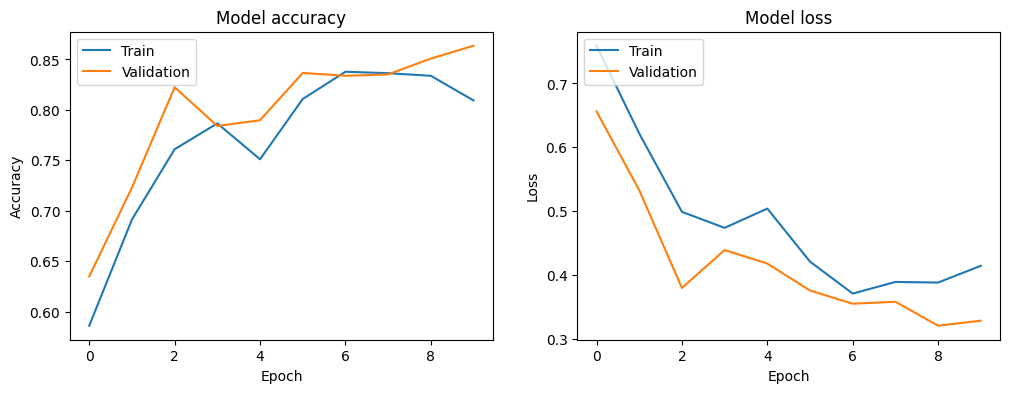

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


**To predict your image:**

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Specify the filename of the image
img_path = '/content/your_image_filename.jpg'  # Replace with your actual image filename

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Reshape the array for the model and normalize the pixel values
img_array = np.expand_dims(img_array, axis=0) / 255.0


In [ ]:
# Load the saved model
model = tf.keras.models.load_model('seafood_classifier_model.h5')

# Predict using the model
prediction = model.predict(img_array)

# Print the prediction result
if prediction[0] > 0.5:
    print("The image is classified as NotSeafood.")
else:
    print("The image is classified as Seafood.")
